# Analisis Kolom Pendaptan terhadap GDPperkapita

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('C:/Users/A r e s/Documents/SANBERCODE/Latihan/Pekan 4/datasets/Data_Negara_HELP.csv')

In [5]:
group1 = df.groupby(['Negara']).sum()
drop1 = group1.drop(columns=['Ekspor', 'Impor', 'Harapan_hidup', 'Kematian_anak', 'Inflasi', 'Kesehatan', 'Jumlah_fertiliti'])
sort1 = drop1.sort_values(by='Pendapatan', ascending=True)
sort1.head(15)

,Pendapatan,GDPperkapita
Negara,,
"Congo, Dem. Rep.",609,334
Liberia,700,327
Burundi,764,231
Niger,814,348
Central African Republic,888,446
Mozambique,918,419
Malawi,1030,459
Guinea,1190,648
Togo,1210,488


Dari data diatas bisa dilihat hubungan kasar antara 'GDPperkapita' terhadap 'Pendapatan', Hubungan antara pendapatan dengan GDPperkapita sudah jelas, karena yang menunjang perekonomian suatu keluarga di suatu negara adalah pendapatan

Hubungan sederhana dari kedua variabel bisa dilihat dari scatterplot dibawah

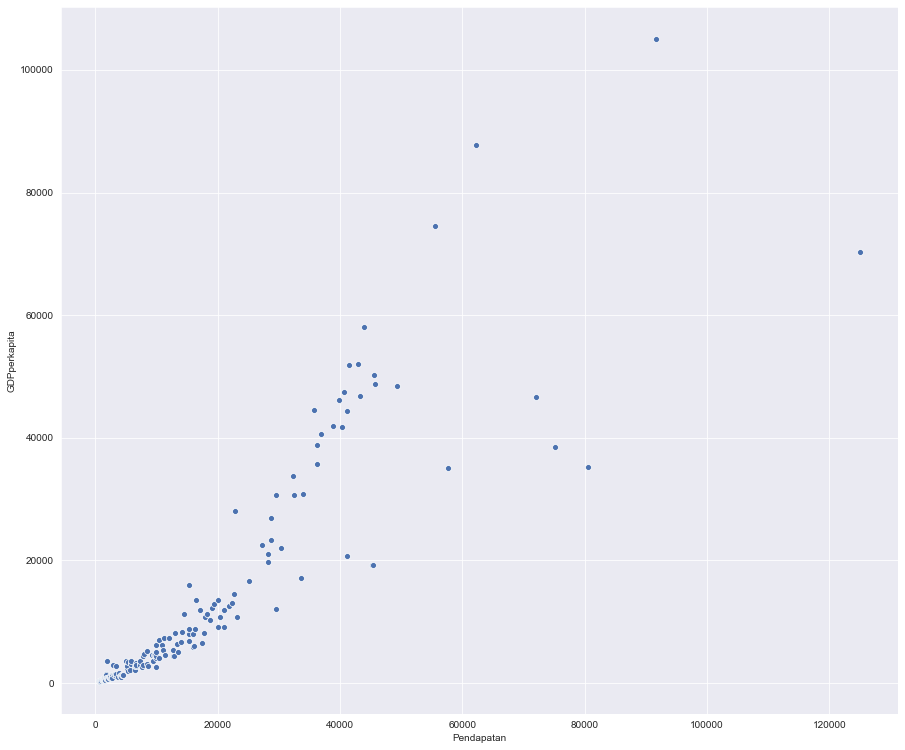

In [6]:
sns.set({'figure.figsize':(15,13)})
sns.scatterplot(x=sort1['Pendapatan'] , y=sort1['GDPperkapita'])

In [8]:
pertimbangan3 = sort1[(sort1['Pendapatan'] > 500) & (sort1['Pendapatan'] < 1000) & (sort1['GDPperkapita'] < 10000)]
pertimbangan3

,Pendapatan,GDPperkapita
Negara,,
"Congo, Dem. Rep.",609,334
Liberia,700,327
Burundi,764,231
Niger,814,348
Central African Republic,888,446
Mozambique,918,419


## Analisis lebih lanjut tentang dampak Kematian anak terhadap GDPperkapita

Untuk menganalisis lebih lanjut topik ini, maka data pada kolom inflasi dan GDPperkapita harus dibersihkan terlebih dahulu

### Missing Value

In [9]:
#Check missing value
sort1.isnull().sum()

Pendapatan      0
GDPperkapita    0
dtype: int64

Karena tidak ada missing value (data NaN) pada dataframe, jadi perlu dilakukan handling missing value

### Outliers dan Clustering

Mendeteksi outlier di kedua kolom menggunakan boxplot

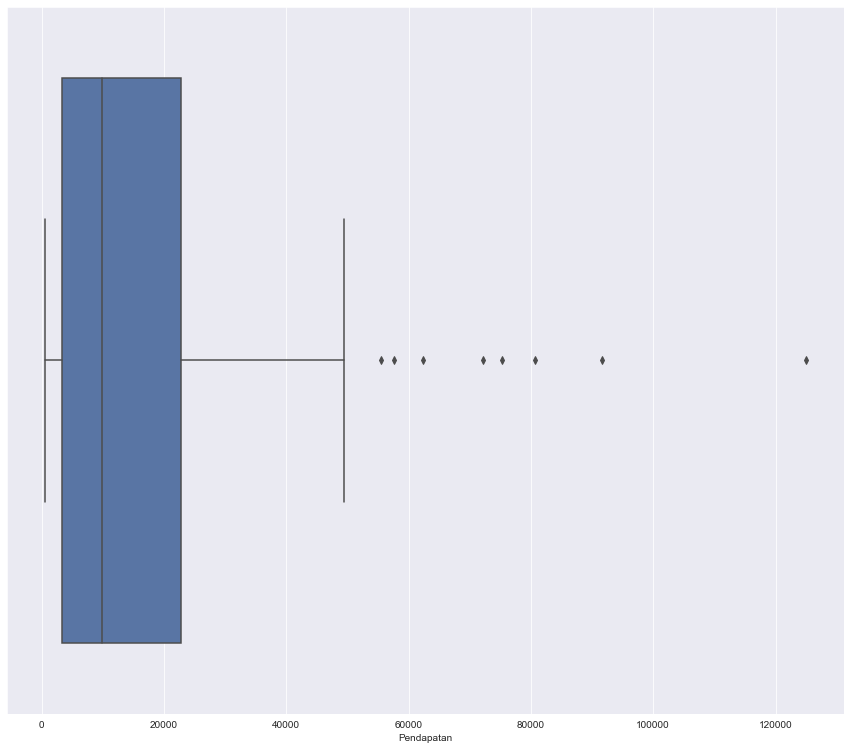

In [10]:
sns.boxplot(sort1['Pendapatan'])

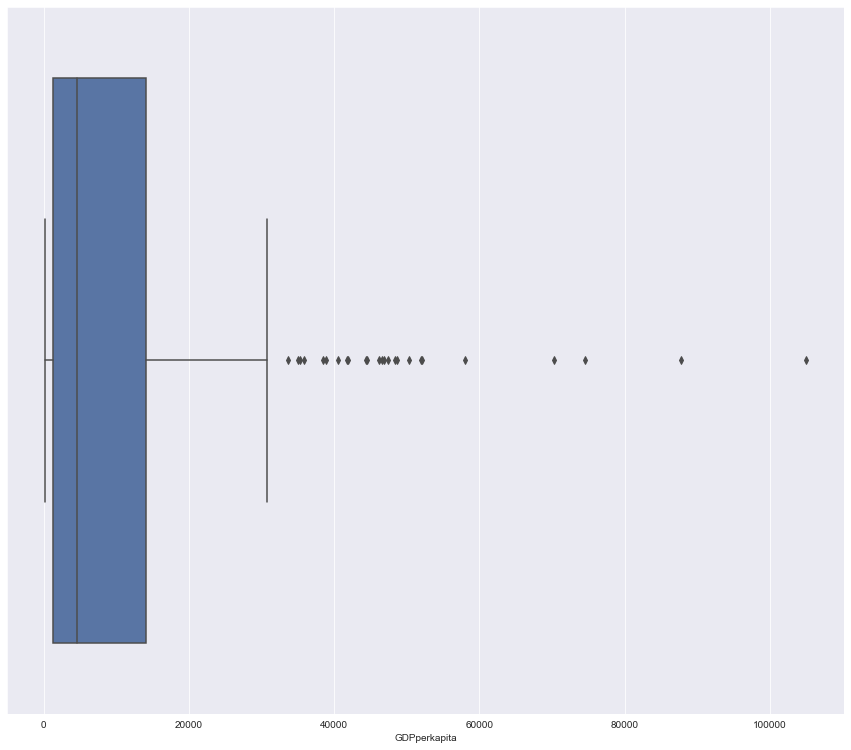

In [11]:
sns.boxplot(sort1['GDPperkapita'])

In [12]:
def batas(x) : 
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    df_final=df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
    return df_final

data = batas(sort1[['Pendapatan', 'GDPperkapita']])
data.dropna(axis=0, inplace=True)
data2 = pd.DataFrame(data=data, columns = ['Pendapatan', 'GDPperkapita'])

sc = StandardScaler()
data_std = sc.fit_transform(data2.astype(float))

data3 = pd.DataFrame(data=data_std, columns = ['Pendapatan', 'GDPperkapita'])

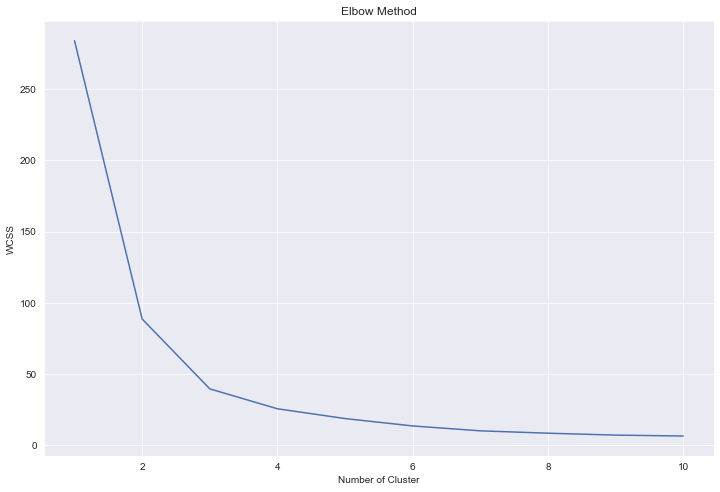

In [13]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(data3)
  wcss.append(kmeans.inertia_)

plt.subplots(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')

plt.show()

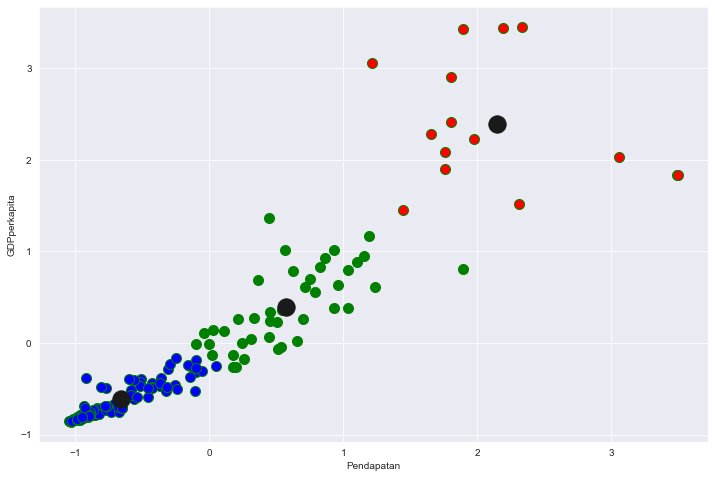

In [14]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(data_std)
labels1 = kmeans.labels_


data3['label_kmeans1'] = labels1

plt.subplots(figsize=(12,8))
plt.scatter(data3['Pendapatan'][data3.label_kmeans1 == 0], data3['GDPperkapita'][data3.label_kmeans1 == 0], color='blue', s=100, edgecolor='green', linestyle='-')
plt.scatter(data3['Pendapatan'][data3.label_kmeans1 == 1], data3['GDPperkapita'][data3.label_kmeans1 == 1], color='red', s=100, edgecolor='green', linestyle='-')
plt.scatter(data3['Pendapatan'][data3.label_kmeans1 == 2], data3['GDPperkapita'][data3.label_kmeans1 == 2], color='green', s=100, edgecolor='green', linestyle='-')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.show()

Pada klaster diatas terdapat 3 klaster, dan klaster tersebut bertingkat
- klaster biru merupakan negara yang memiliki nilai pendapatan perkeluarganya rendah
- klaster hijau mungkin bisa dibilang middle class
- klaster merah adalah negara dengan pendapatan perkeluarganya tinggi, negara yang berada pada klaster ini rata-rata adalah negara maju

## Kesimpulan

Negara yang dipertimbangkan untuk dimasukkan sebagai penerima bantuan dari HELP Internasional :

- Congo, Dem. Rep.	
- Liberia
- Burundi
- Niger
- Central African Republic	
- Mozambique